# Задания

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import locale

locale.setlocale(locale.LC_TIME, 'ru_RU.UTF-8')

'ru_RU.UTF-8'

## Доверительные интервалы

### Задание 1

Построй диаграмму зависимости количества проданной пиццы от дня недели.
Вывести дни недели, в которые продано **больше** и  **меньше** всего пиццы.

In [2]:
df = pd.read_csv('../datasets/pizza.csv', low_memory=False, sep=';',
                 parse_dates={'order_dt': ['order_date', 'order_time']})
df['lead_time'] = pd.to_datetime(df.lead_time)
df['cook_time'] = df.lead_time - df.order_dt
df.cook_time = df.cook_time.dt.total_seconds()
df['order_dt'].dt.to_period('W').dt.to_timestamp()
df['weekday'] = df.order_dt.dt.strftime('%A')
df['wd_num'] = [x if x > '0' else '7' for x in df.order_dt.dt.strftime('%w')]

/tmp/ipykernel_118485/641889714.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('../datasets/pizza.csv', low_memory=False, sep=';',


In [3]:
df[:5]

,order_dt,order_details_id,order_id,pizza_id,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,lead_time,cook_time,weekday,wd_num
0,2015-01-01 11:38:36,1,1,hawaiian_m,"13,25","13,25",M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015-01-01 11:53:30,894.0,Четверг,4
1,2015-01-01 11:57:40,2,2,classic_dlx_m,16,16,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-01-01 12:16:26,1126.0,Четверг,4
2,2015-01-01 11:57:40,3,2,five_cheese_l,"18,5","18,5",L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015-01-01 12:16:19,1119.0,Четверг,4
3,2015-01-01 11:57:40,4,2,ital_supr_l,"20,75","20,75",L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01-01 12:10:58,798.0,Четверг,4
4,2015-01-01 11:57:40,5,2,mexicana_m,16,16,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-01-01 12:14:24,1004.0,Четверг,4


In [4]:
df1 = df[['wd_num', 'weekday', 'pizza_id']]\
    .groupby(['wd_num', 'weekday'])\
    .agg('count').sort_values('wd_num').copy()
df1.reset_index(inplace=True)
# df1.drop('wd_num', axis=1, inplace=True)
# df1.set_index('pizza_id', inplace=True)
df1

,wd_num,weekday,pizza_id
0,1,Понедельник,634
1,2,Вторник,702
2,3,Среда,655
3,4,Четверг,857
4,5,Пятница,818
5,6,Суббота,706
6,7,Воскресенье,628


[(0.0, 950.0)]

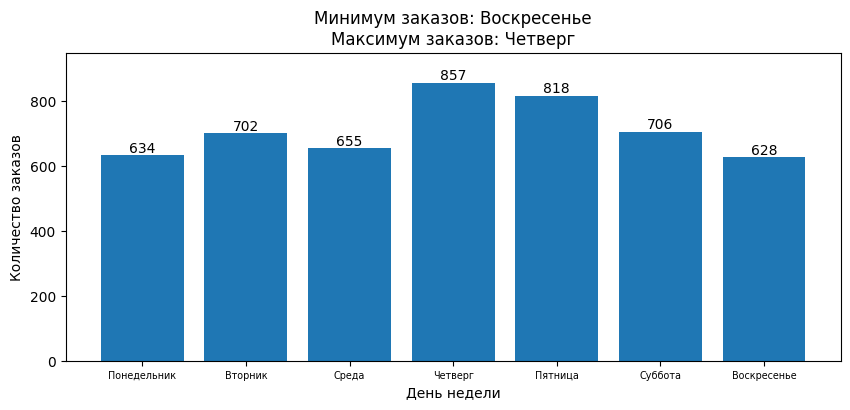

In [5]:
fig1, ax1 = plt.subplots(figsize=(10, 4))
plt.bar(df1.weekday,
        df1.pizza_id)
ax1.set_xlabel('День недели')
ax1.set_ylabel('Количество заказов')
ax1.bar_label(ax1.containers[0])
ax1.tick_params(axis='x', labelsize='x-small')
ax1.set_title('Минимум заказов: '+df1[df1['pizza_id'] == df1['pizza_id'].
                                      min()]['weekday'].iloc[0]+'\n' +
              'Максимум заказов: ' + df1[df1['pizza_id'] == df1['pizza_id'].
                                         max()]['weekday'].iloc[0])
ax1.set(ylim=(0, 950))

### Задание 2

Посчитай, сколько **секунд** необходимо для приготовления каждой пиццы по всем заказам. Значения сохранить в новый столбец - `cook_time`. Найти среднее, медианное, максимальное и минимальное время приготовления пиццы. Результат округлите до целого.

In [6]:
print('Среднее:', df.cook_time.mean().round())
print('Медианное:', df.cook_time.median().round())
print('Минимальное:', df.cook_time.min().round())
print('Максимальное:', df.cook_time.max().round())

Среднее: 1007.0
Медианное: 1006.0
Минимальное: 444.0
Максимальное: 1609.0


### Задание 3

Построй 95% доверительный интервал для среднего времени приготовления пиццы в **секундах**. Интервал округли до целого
> Для расчета стандартного отклонения используй `numpy.std(ddof=1)`

Формула доверительного интервала: $CI = \bar{x} \pm z \frac{s}{\sqrt{n}}$,
где: 
- CI - доверительный интервал
- x - выборочное среднее значение
- z - значение уровня достоверности 
- s - стандартное отклонение выборки
- n - размер выборки

In [7]:
import scipy.stats as st


def confidence_int(data, z=0.95):
    n = len(data)
    x = np.mean(data)
    s = np.std(data, ddof=1)
    dev = (s / np.sqrt(n))
    int1, int2 = st.norm.interval(confidence=z, loc=x, scale=dev)
    return round(int1), round(int2)

In [8]:
confidence_int(df.cook_time, 0.95)

(1002, 1012)

### Задание 4

Хозяин ресторана хочет оптимизировать меню ресторана. При формировании цены на пиццу хозяин хочет учитывать время 
её изготовления. Давай найдем ту пиццу (pizza_name), у которой верхняя граница доверительного интервала её изготовления 
самая высокая.
> Среди пицц, у которых за все время заказывали более 100 штук

In [9]:
df2 = df[df['pizza_name'].map(df['pizza_name'].value_counts()) > 100]

In [10]:
df2.shape

(4427, 14)

In [11]:
df3 = df2[['pizza_name', 'cook_time']].groupby(
    'pizza_name').agg(confidence_int).reset_index()
df3[df3.cook_time == df3['cook_time'].max()]['pizza_name'].iloc[0]

'The Italian Vegetables Pizza'

### Задание 5

Также хозяину ресторана хочется убрать из меню пиццы с нестабильным временем изготовления. 
Давай найдем пиццу с самым широким доверительным интервалом.
> Среди пицц, у которых за все время заказывали более 100 штук

In [12]:
df3['int'] = df3['cook_time'].apply(lambda x: int(x[1]) - int(x[0]))

In [13]:
df3[df3.int == df3['int'].max()]['pizza_name'].iloc[0]

'The Chicken Alfredo Pizza'

## AB тестирование

### Задание 6

В качестве нулевой гипотезы (H0) выберем, что старый баннер лучше нового.  В качестве альтернативной гипотезы (H1) выберем, 
что новый баннер лучше старого. Построй 95% доверительный интервал для доли каждого из баннеров, используя метод 
[proportion_confint](https://www.statsmodels.org/devel/generated/statsmodels.stats.proportion.proportion_confint.html)
библиотеки statsmodels. Пересекаются ли эти интервалы?

In [14]:
from statsmodels.stats.proportion import proportion_confint
df4 = pd.read_csv('../datasets/click.csv')
# ={'order_dt': ['order_date', 'order_time']})
df4.head(3)

,banner_a,banner_b
0,0,0
1,1,1
2,0,0


In [15]:
h0_low, h0_upp = proportion_confint(
    df4['banner_a'].sum(), df4['banner_a'].count())
h0_low, h0_upp

(0.02530064022092865, 0.04869935977907135)

In [16]:
h1_low, h1_upp = proportion_confint(
    df4['banner_b'].sum(), df4['banner_b'].count())
h1_low, h1_upp

(0.03911451622486782, 0.06688548377513218)

In [17]:
print(['Пересекаются', 'Не пересекаются']
      [max(h0_low, h1_low) > min(h0_upp, h1_upp)])

Пересекаются


### Задание 7

Для более детальной оценки построй 95% доверительный интервал для разности двух долей.
**Ответ дай в формате:**\
95% доверительный интервал для разности двух долей: [0.99847, 9.99847]

Левая и правая границы доверительного интервала рассчитываются по формулам:
$$p_a - p_b \pm z * \sqrt{\frac{p_a(1 - p_a)}{n_a} + \frac{p_b(1 - p_b)}{n_b}}$$
Где

$p_a = \frac{n_{like(a)}}{n_{a}}$,

$p_b = \frac{n_{like(b)}}{n_{b}}$,

$z = 1-\frac{\alpha}{2}$ (используй scipy.stats.norm.ppf)

$n_a$ - общее количество кликов по баннеру а

$n_b$ - общее количество кликов по баннеру b

$n_{like(a)}$ - количество лайков по баннеру а

$n_{like(b)}$ - количество лайков по баннеру b

In [18]:
n_like_a = df4['banner_a'].sum()
n_like_b = df4['banner_b'].sum()
n_a = df4['banner_a'].count()
n_b = df4['banner_b'].count()
p_a = n_like_a / n_a
p_b = n_like_b / n_b
z = st.norm.ppf(1 - 0.05 / 2)
dif_low = p_a - p_b - z * ((p_a * (1 - p_a)) / n_a +
                           (p_b * (1 - p_b)) / n_b) ** 0.5
dif_upp = p_a - p_b + z * ((p_a * (1 - p_a)) / n_a +
                           (p_b * (1 - p_b)) / n_b) ** 0.5
dif_low, dif_upp

(-0.0341571385110543, 0.002157138511054299)

### Задание 8

Проведи АБ-тест. Какой баннер лучше? H0 - Старый баннер или H1 - новый баннер.
В этом тебе поможем функция [z-критерия](../code-samples/stats.py).

$$Z({X_1, X_2}) =  \frac{p_a - p_b}{\sqrt{P(1 - P)(\frac{1}{n_a} + \frac{1}{n_b})}}$$
$$P = \frac{p_a{n_a} + p_b{n_b}}{{n_a} + {n_b}} $$

$p_a, p_b = \frac{∑кликов}{n}$, n - общее количество кликов по баннеру

$n_a$ - общее количество кликов по баннеру а

$n_b$ - общее количество кликов по баннеру b

In [19]:
def z_stat(sample1, sample2):
    n_a = len(sample1)
    n_b = len(sample2)

    p_a = float(sum(sample1)) / n_a
    p_b = float(sum(sample2)) / n_b
    P = float(p_a * n_a + p_b * n_b) / (n_a + n_b)

    return (p_a - p_b) / np.sqrt(P * (1 - P) * (1. / n_a + 1. / n_b))

Проверка гипотезы H0, что старый баннер лучше.

In [20]:
z_stat(df4['banner_a'], df4['banner_b'])

-1.7258261378415294

Неудачно.

Проверка гипотезы H1, что новый баннер лучше.

In [21]:
z_stat(df4['banner_b'], df4['banner_a'])

1.7258261378415294

Успешно. 

Ответ: новый баннер нравится больше

## Корреляции

### Задание 9

Прочитай про корреляции Пирсона и Спирмена. Узнай какие связи между выборками они способны находить. По сгенерированным выборкам посчитай коррелицию Пирсона и Спирмена для выборок `x-y1`, `x-y2`, `x-y3`. Отрисуй выборки в формате, как показано ниже:
<img src="../misc/images/corr.png">

Объясни, почему получается такое значение корреляций.

In [22]:
x = np.linspace(-10, 10, 100)
y1 = x ** 2
y2 = -x ** 2
y3 = np.log(x ** 2 + 1)

Text(0.5, 1.0, 'Pearson correlation = 0.0\nSpearman correlation = -0.0')

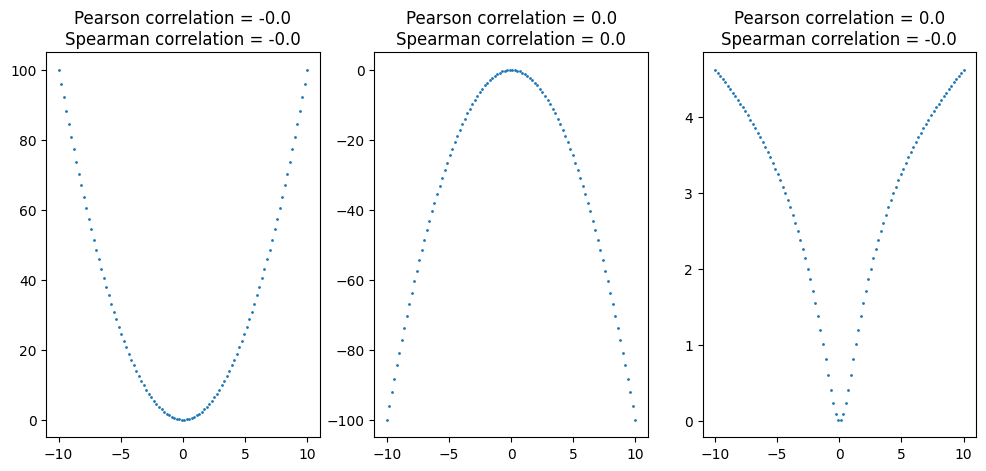

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))
ax1.scatter(x, y1, s=1)
ax1.set_title('Pearson correlation = {}\nSpearman correlation = {}'.
              format(round(st.pearsonr(x, y1)[0], 2), round(st.spearmanr(x, y1)[0], 2)))
ax2.scatter(x, y2, s=1)
ax2.set_title('Pearson correlation = {}\nSpearman correlation = {}'.
              format(round(st.pearsonr(x, y2)[0], 2), round(st.spearmanr(x, y2)[0], 2)))
ax3.scatter(x, y3, s=1)
ax3.set_title('Pearson correlation = {}\nSpearman correlation = {}'.
              format(round(st.pearsonr(x, y3)[0], 2), round(st.spearmanr(x, y3)[0],  2)))

Ответ: Значение всех корреляций равно 0.

### Задание 10

Построй облако из тысячи точек c помощью приведенного кода.
Выведи значения коэффициентов корреляции.
Случайным образом выбери четыре точки. Каждую из точек передвигать в правый верхний угол относительно облака точек 
(тем самым создавая выброс):
значения по оси х 25, 50, 150, 650
по оси y 20, 40, 60, 80.
Выводи на графике перемещения точек.
Для каждого расстояния рассчитай коэффициент корреляции Пирсона и Спирмана.
Какая корреляция больше устойчива к выбросам?

In [24]:
step = np.linspace(-10, 0, 1000)
x = -step + np.random.randn(1000) * 0.2
y = step + np.random.randn(1000) * 0.2

Text(0.5, 1.0, 'Pearson correlation = -1.0\nSpearman correlation = -1.0')

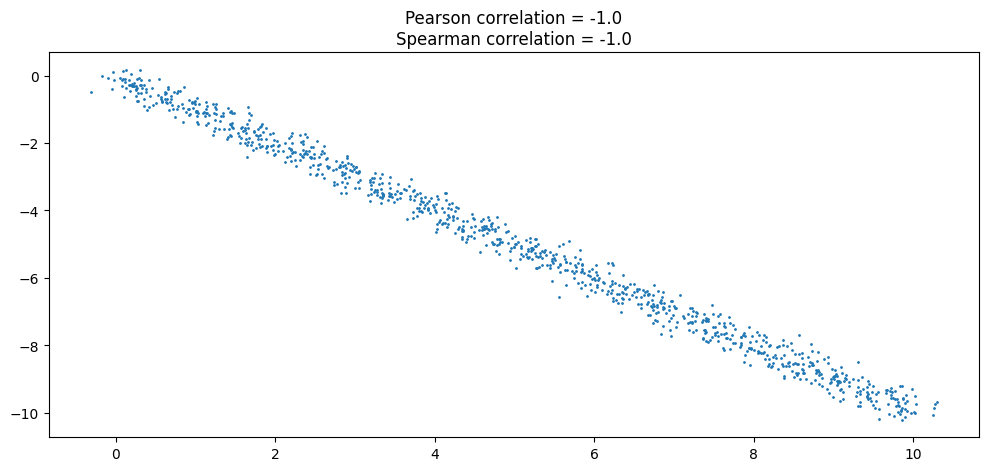

In [25]:
p1, s1 = st.pearsonr(x, y)[0], st.spearmanr(x, y)[0]
fig, ax = plt.subplots(figsize=(12, 5))
ax.scatter(x, y, s=1)
ax.set_title('Pearson correlation = {}\nSpearman correlation = {}'.format(round(p1, 2),
                                                                          round(s1, 2)))

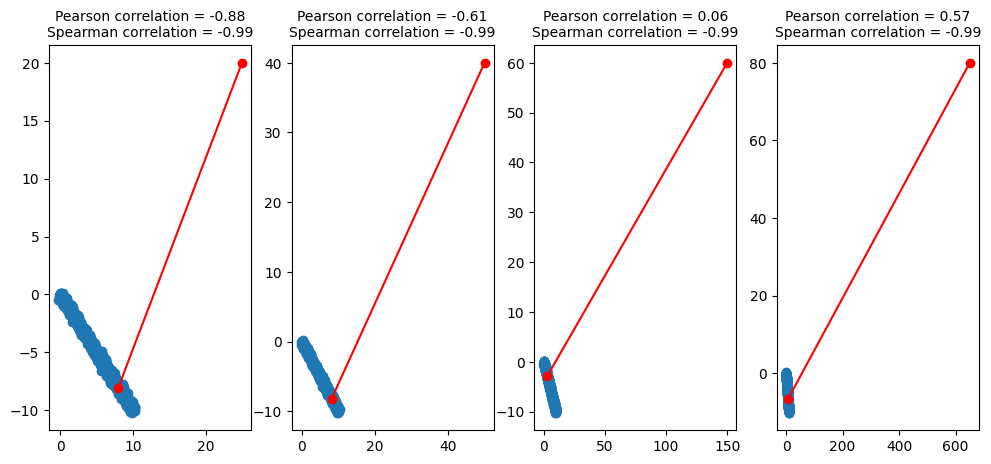

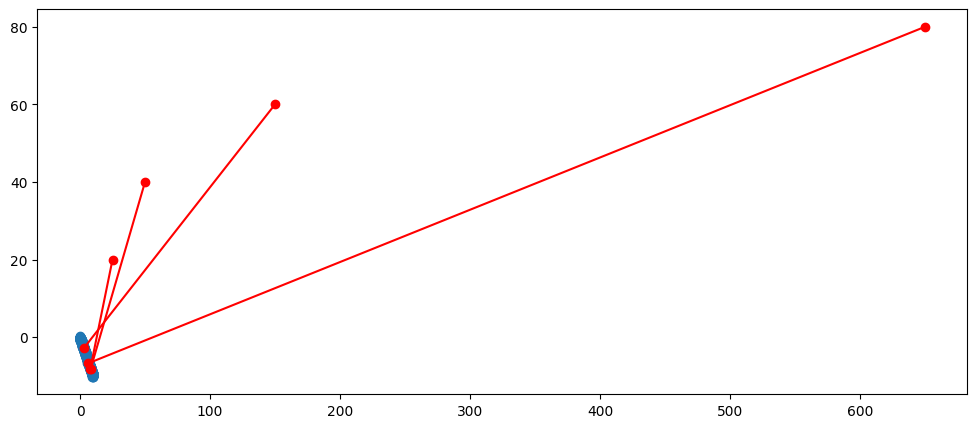

In [26]:
n_rand4 = np.random.randint(0, 1000, 4)
x_diff = [25, 50, 150, 650]
y_diff = [20, 40, 60, 80]
fig, ax = plt.subplots(1, 4, figsize=(12, 5))
for n in range(4):
    x1, y1 = x.copy(), y.copy()
    ax[n].scatter(x1, y1)
    ax[n].plot([x1[n_rand4[n]], x_diff[n]], [y1[n_rand4[n]], y_diff[n]], 'o-r')
    x1[n_rand4[n]] = x_diff[n]
    y1[n_rand4[n]] = y_diff[n]
    p1, s1 = st.pearsonr(x1, y1)[0], st.spearmanr(x1, y1)[0]
    ax[n].set_title('Pearson correlation = {}\nSpearman correlation = {}'.
                    format(round(p1, 2), round(s1, 2)), size='medium')
fig, ax = plt.subplots(figsize=(12, 5))
ax.scatter(x, y)
for n in range(4):
    ax.plot([x[n_rand4[n]], x_diff[n]], [y[n_rand4[n]], y_diff[n]], 'o-r')
# plt.tight_layout()
# plt.show()

Более устойчива корреляция Спирмана